In [1]:
import os
import pandas as pd
from utils import CONDITIONS
import matplotlib.pyplot as plt

In [2]:
def process_into_df(data_split):
    dirs = os.listdir('results')
    d = {}
    indices = []
    for filename in dirs:
        if filename.split('_')[0] == data_split:
            df = pd.read_csv('results/' + filename)
            df.index = pd.Index(CONDITIONS + ['Macro', 'Micro'])
            filename = filename.replace('.csv', '')
            split = filename.split('_')
            seed = split[-1]
            dim = split[-2]

            # Append dict
            # if dim not in d.keys():
            #     d[dim] = {}
            
            # d[dim][seed] = df
            idx = (dim, seed)
            d[idx] = df

    
    # df =  pd.DataFrame.from_dict({(i,j): d[i][j] 
    #                        for i in d.keys() 
    #                        for j in d[i].keys()},
    #                    orient='index')
    df = pd.concat(d)
    df = df.reset_index()
    df.columns = pd.Index(['Dim', 'Seed', 'Diagnosis'] + list(df.columns)[3:])
    df['Dim'] = df['Dim'].astype(int)
    df = df.sort_values(by=['Dim', 'Seed'])
    return df
        

df = process_into_df('test')

<AxesSubplot:xlabel='Dim'>

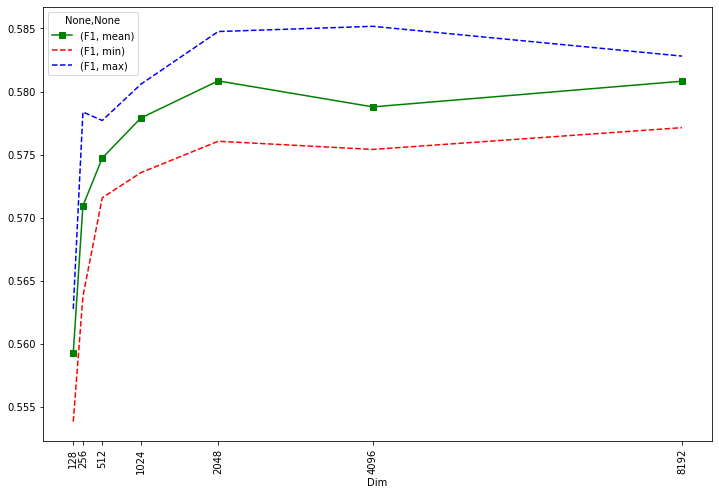

In [3]:
df[df['Diagnosis'] == 'Macro'].groupby('Dim').agg({
    'F1': ['mean', 'min', 'max'],
    # 'Recall': ['mean', 'min', 'max'],
}).plot(
    kind='line',
    # logx=True, 
    style=['gs-', 'r--', 'b--', ], 
    xticks=df['Dim'].unique(),
    figsize=(12, 8),
    rot=90,
)

<AxesSubplot:xlabel='Dim'>

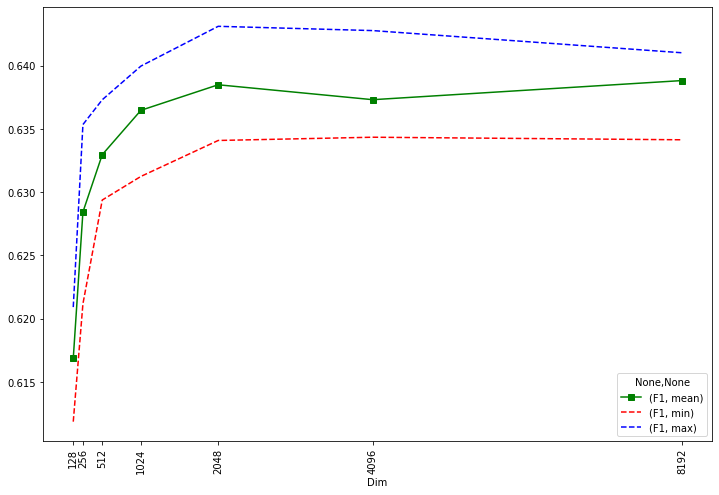

In [4]:
df[df['Diagnosis'] == 'Micro'].groupby('Dim').agg({
    'F1': ['mean', 'min', 'max'],
    # 'Recall': ['mean', 'min', 'max'],
}).plot(
    kind='line',
    logx=False, 
    style=['gs-', 'r--', 'b--', ], 
    xticks=df['Dim'].unique(),
    figsize=(12, 8),
    rot=90
)

In [5]:
df = process_into_df('val')

<AxesSubplot:xlabel='Dim'>

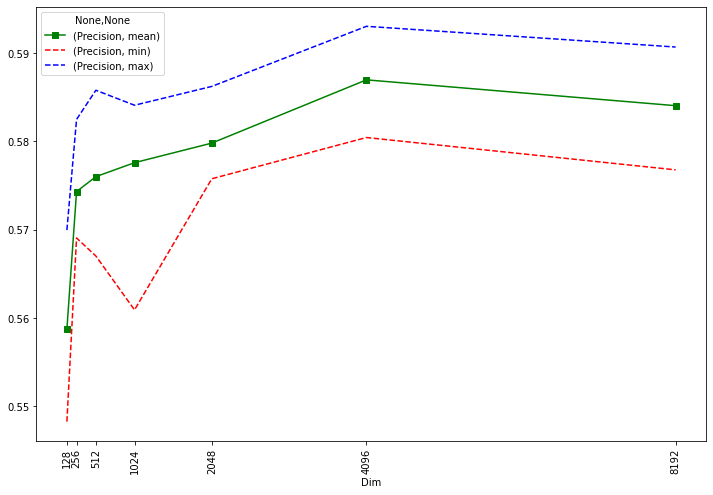

In [6]:
df[df['Diagnosis'] == 'Macro'].groupby('Dim').agg({
    # 'F1': ['mean', 'min', 'max'],
    # 'Recall': ['mean', 'min', 'max'],
    'Precision': ['mean', 'min', 'max'],
}).plot(
    kind='line',
    # logx=True, 
    style=['gs-', 'r--', 'b--', ], 
    xticks=df['Dim'].unique(),
    figsize=(12, 8),
    rot=90,
)

<AxesSubplot:xlabel='Dim'>

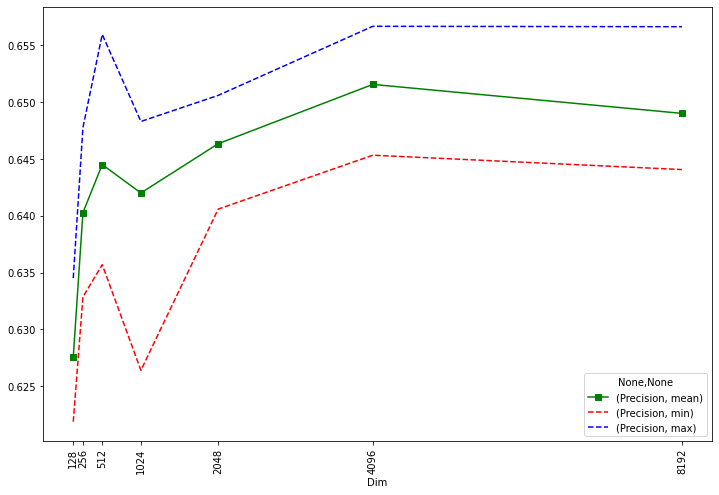

In [7]:
df[df['Diagnosis'] == 'Micro'].groupby('Dim').agg({
    # 'F1': ['mean', 'min', 'max'],
    # 'Recall': ['mean', 'min', 'max'],
    'Precision': ['mean', 'min', 'max'],
}).plot(
    kind='line',
    logx=False, 
    style=['gs-', 'r--', 'b--', ], 
    xticks=df['Dim'].unique(),
    figsize=(12, 8),
    rot=90
)